# BreizhCrops Field Parcels

In [1]:
import sys
sys.path.append("..")

import pandas as pd

import geopandas as gpd
import os
import matplotlib.pyplot as plt

from breizhcrops import BreizhCrops
from mpl_toolkits.axes_grid1 import make_axes_locatable

root="../data"

In [2]:
frh01 = BreizhCrops(region="frh01", root=root, load_timeseries=False)
frh02 = BreizhCrops(region="frh02", root=root, load_timeseries=False)
frh03 = BreizhCrops(region="frh03", root=root, load_timeseries=False)
frh04 = BreizhCrops(region="frh04", root=root, load_timeseries=False)

Initializing BreizhCrops region frh01
Initializing BreizhCrops region frh02
Initializing BreizhCrops region frh03
Initializing BreizhCrops region frh04


In [3]:
frh01_gdf = frh01.geodataframe()
frh02_gdf = frh02.geodataframe()
frh03_gdf = frh03.geodataframe()
frh04_gdf = frh04.geodataframe()

rdf = gpd.GeoDataFrame( pd.concat( [frh01_gdf,frh02_gdf,frh03_gdf,frh04_gdf], ignore_index=False) )

### Parcels colored by Regions

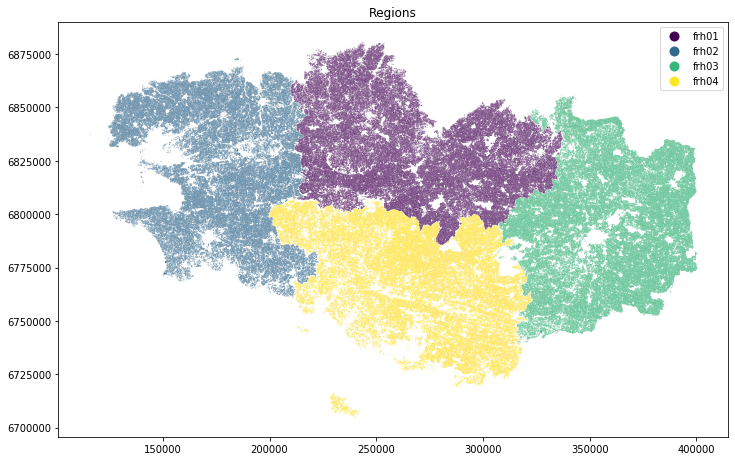

In [6]:
fig,ax = plt.subplots(figsize=(12,12))
ax.set_title("Regions")
rdf.plot(column="region",ax=ax, cmap='viridis', legend=True)

### Parcels colored by Class

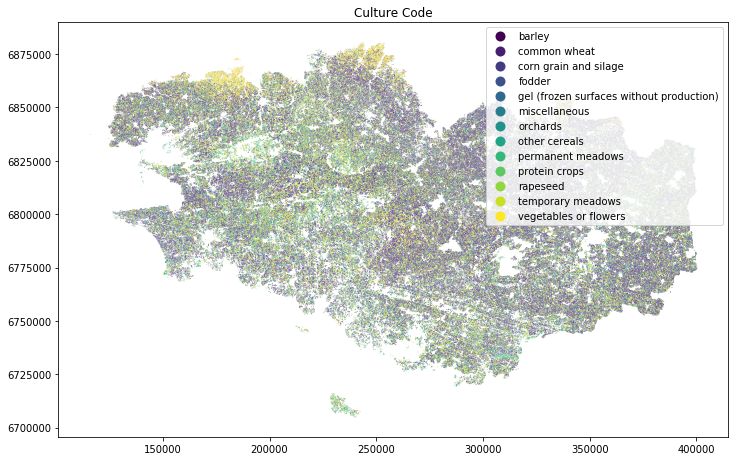

In [5]:
fig,ax = plt.subplots(figsize=(12,12))

mapping = frh01.mapping.reset_index()
rdf_ = rdf.loc[rdf["CODE_CULTU"].isin(frh01.mapping.index)]
gdf = pd.merge(rdf_, mapping, left_on="CODE_CULTU", right_on="code")

ax.set_title("Culture Code")
gdf.plot(column="classname",ax=ax, cmap='viridis', legend=True)

### Parcels colored by Cloud Coverage 
(mean QA60 over time)

/home/marc/miniconda3/envs/breizhcrops/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


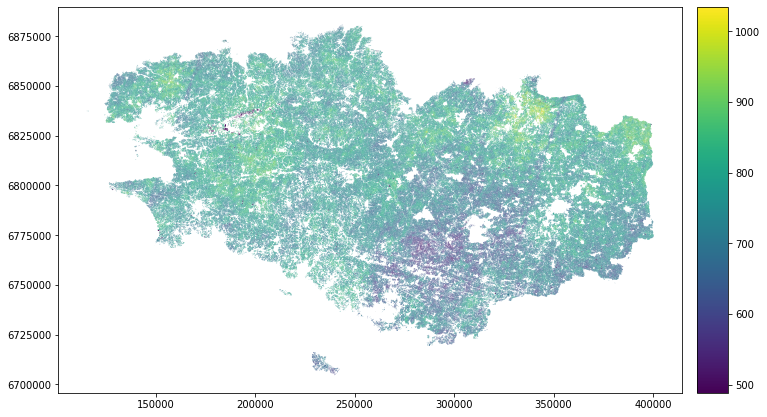

In [9]:
fig,ax = plt.subplots(figsize=(12,12))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
rdf.plot(column="meanQA60",ax=ax, cax=cax, cmap='viridis', legend=True)

### Parcels colored by Sequence Length

/home/marc/miniconda3/envs/breizhcrops/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


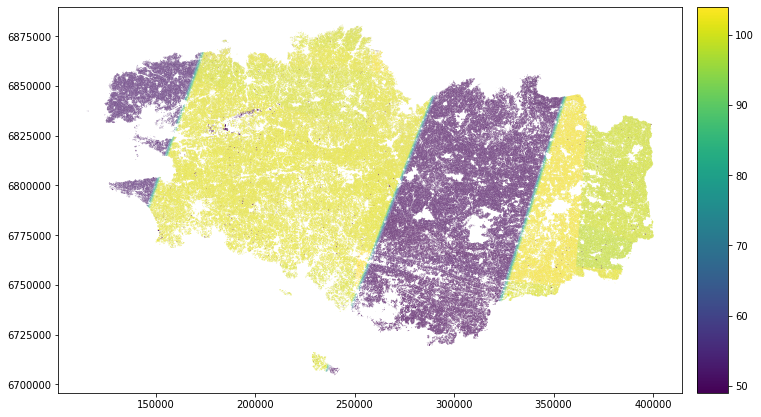

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(figsize=(12,12))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
rdf.plot(column="sequencelength",ax=ax, cax=cax, cmap='viridis', legend=True)